In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from graphviz import Digraph
from decision_tree import DecisionTree

In [2]:
# Load data and split into train test
dt = load_breast_cancer()
X = pd.DataFrame(dt.data, columns= list(dt.feature_names))
y = pd.Series(dt.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [3]:
# Initialize a DecisionTree object
tree = DecisionTree( max_depth= 5)
# Train the tree
tree.fit(X_train, y_train)

best_lambda: 1.0, feature: worst concave points, threshold: 0.14235 Depth: 0
best_lambda: 1.0, feature: worst area, threshold: 957.45 Depth: 1
best_lambda: 1.0, feature: radius error, threshold: 1.04755 Depth: 2
best_lambda: 1.0, feature: mean radius, threshold: 7.7255 Depth: 3
best_lambda: 1.0, feature: mean radius, threshold: 7.978 Depth: 4
best_lambda: 1.0, feature: mean radius, threshold: 8.2075 Depth: 5
best_lambda: 1.0, feature: worst concavity, threshold: 0.1907 Depth: 2
best_lambda: 1.0, feature: mean texture, threshold: 21.259999999999998 Depth: 3
best_lambda: 1.0, feature: mean perimeter, threshold: 71.815 Depth: 1
best_lambda: 1.0, feature: texture error, threshold: 0.45794999999999997 Depth: 2
best_lambda: 1.0, feature: mean smoothness, threshold: 0.079285 Depth: 3
best_lambda: 1.0, feature: worst concavity, threshold: 0.2034 Depth: 4
best_lambda: 1.0, feature: mean radius, threshold: 11.015 Depth: 5


In [4]:
# Make predictions
predictions = tree.predict(X_test)

        Metric     Value
0     Accuracy  0.938596
1    Precision  0.944444
2       Recall  0.957746
3     F1 Score  0.951049
4          MCC  0.868860
5  Cohen Kappa  0.868707
6      AUC-ROC  0.932362
7       AUC-PR  0.964253


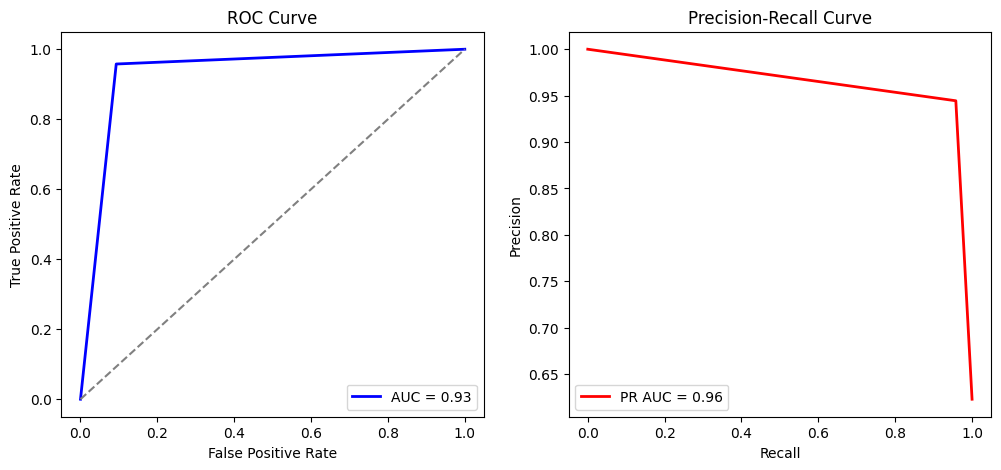

In [5]:
# Evaluate performance
metrics_df = tree.performance_metrics(X_test, y_test)

In [6]:
# Extract rules
rules = tree.extract_rules()
for rule in rules:
    print(rule)

[('worst concave points', '<=', 0.14235), ('worst area', '<=', 957.45), ('radius error', '<=', 1.04755), ('mean radius', '<=', 7.7255)]
[('worst concave points', '<=', 0.14235), ('worst area', '<=', 957.45), ('radius error', '<=', 1.04755), ('mean radius', '>', 7.7255), ('mean radius', '<=', 7.978)]
[('worst concave points', '<=', 0.14235), ('worst area', '<=', 957.45), ('radius error', '<=', 1.04755), ('mean radius', '>', 7.7255), ('mean radius', '>', 7.978), ('mean radius', '<=', 8.2075)]
[('worst concave points', '<=', 0.14235), ('worst area', '<=', 957.45), ('radius error', '<=', 1.04755), ('mean radius', '>', 7.7255), ('mean radius', '>', 7.978), ('mean radius', '>', 8.2075)]
[('worst concave points', '<=', 0.14235), ('worst area', '>', 957.45), ('worst concavity', '<=', 0.1907)]
[('worst concave points', '>', 0.14235), ('mean perimeter', '<=', 71.815)]
[('worst concave points', '>', 0.14235), ('mean perimeter', '>', 71.815), ('texture error', '<=', 0.45794999999999997)]
[('worst 

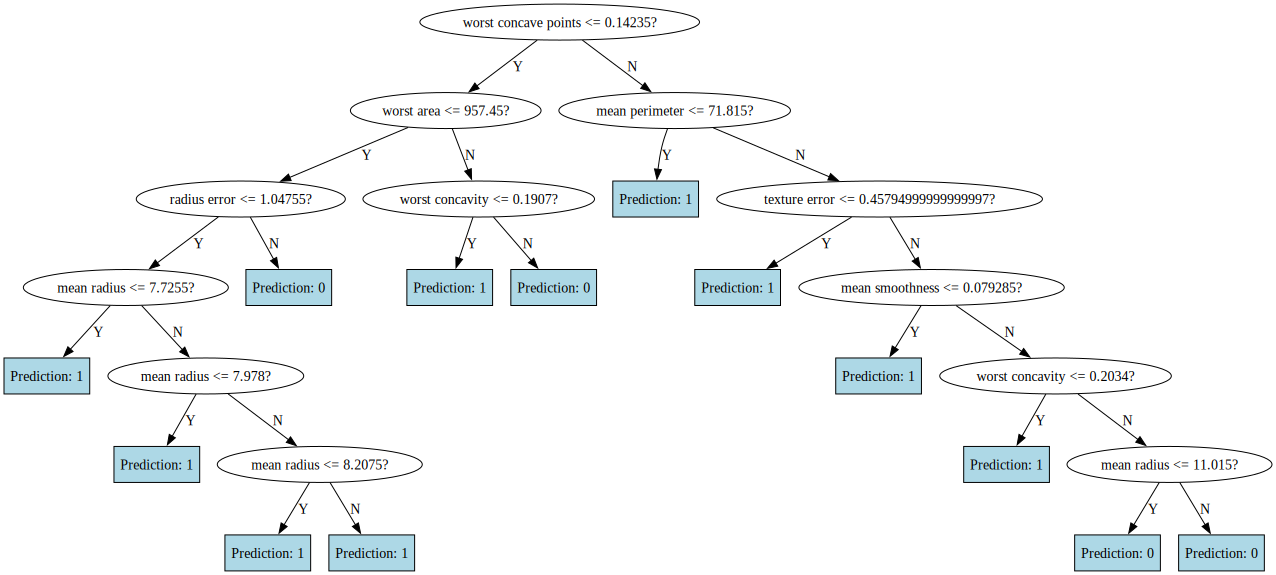

In [7]:
# Plot tree
graph = Digraph(format='png')
_ = tree.plot_tree(graph=graph)
display(graph)

In [ ]:
if False:
    def generate_homogeneity_conditions(node):
        """
        Generate a single rule by traversing only the right (>) branch 
        starting from the given node, connecting conditions with AND logic.
        """
        conditions = []
        current_node = node

        # Traverse the tree following the right branch only
        while current_node.right is not None:
            condition = f"({current_node.feature} > {current_node.threshold})"
            conditions.append(condition)
            current_node = current_node.right  # follow right (>) branch

        # Once at leaf, append the class prediction
        rule = " AND ".join(conditions)
        rule += f" --> Class {current_node.value}"

        return rule

    def extract_homogenity_and_complementary_rules(current_node, homogeneity_rules=None, complementary_rules=None):
        """
        Recursive extraction of R and R_hat rules:
        - At each recursion, generates a rule by traversing the right (>) branches.
        - Stores left-side conditions as complementary conditions (< conditions).
        """
        if homogeneity_rules is None:
            homogeneity_rules = []
        if complementary_rules is None:
            complementary_rules = []

        # Generate and append the right-branch rule
        rule = generate_homogeneity_conditions(current_node)
        homogeneity_rules.append(rule)

        # If left child exists, store the complementary condition and recurse left
        if current_node.left is not None:
            condition = f"(Feature {current_node.feature} < {current_node.threshold})"
            complementary_rules.append(condition)

            # Recursive call on left subtree
            extract_homogenity_and_complementary_rules(current_node.left, homogeneity_rules, complementary_rules)

        return homogeneity_rules, complementary_rules

In [11]:
homogenity_rules, complementary_rules = tree.extract_homogenity_and_complementary_rules(tree.root)

print("homogenity rules:")
for rule in homogenity_rules:
    print("-", rule)

print("\ncomplementary rules:")
for condition in complementary_rules:
    print("-", condition)

homogenity rules:
- (worst concave points > 0.14235) AND (mean perimeter > 71.815) AND (texture error > 0.45794999999999997) AND (mean smoothness > 0.079285) AND (worst concavity > 0.2034) AND (mean radius > 11.015) --> Class 0
- (worst area > 957.45) AND (worst concavity > 0.1907) --> Class 0
- (radius error > 1.04755) --> Class 0
- (mean radius > 7.7255) AND (mean radius > 7.978) AND (mean radius > 8.2075) --> Class 1
-  --> Class 1

complementary rules:
- (Feature worst concave points < 0.14235)
- (Feature worst area < 957.45)
- (Feature radius error < 1.04755)
- (Feature mean radius < 7.7255)
